<a href="https://colab.research.google.com/github/KirtiRanjan26/Complete-Data-Science/blob/main/practical_implementation_of_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [11]:
# insert dataset
df = pd.read_csv("/content/height_weight.csv")   # Make sure the file is in the same folder
print(df)

    Height  Weight
0      150      50
1      152      52
2      155      54
3      157      56
4      160      58
5      162      60
6      165      62
7      167      65
8      170      68
9      172      70
10     175      72
11     177      75
12     180      78
13     182      80
14     185      84
15     188      88
16     190      90


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Text(0, 0.5, 'Height')

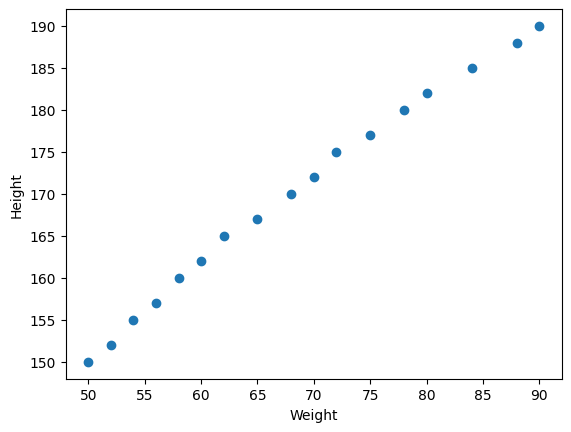

In [ ]:
# visualization data and corrrelation
plt.scatter(df['Weight'],df['Height'])
plt.xlabel("Weight")
plt.ylabel("Height")


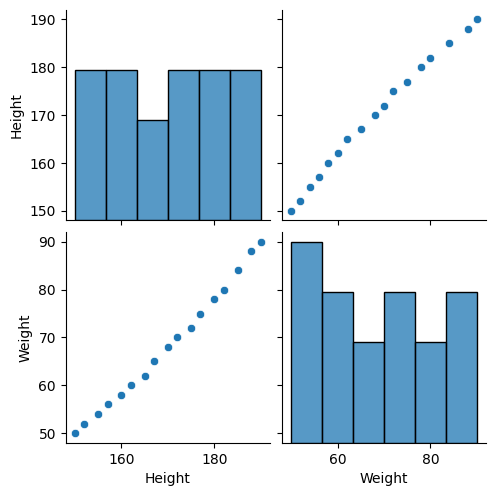

In [ ]:
sns.pairplot(df)

In [12]:
#independent and Dependent feature
X=df[['Weight']] ## independent feature always be a 2D array or Dataframe
print(type(X))
Y=df['Height'] ## dependent feature are Series
print(type(Y))

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.series.Series'>


In [13]:
#train and test split
from sklearn.model_selection import train_test_split
X_train,X_test,Y_train,Y_test= train_test_split(X,Y,test_size=0.3,random_state=42)


In [ ]:
print(Y_test)

0     150
1     152
5     162
15    188
11    177
14    185
Name: Height, dtype: int64


In [14]:
#standarization
from sklearn.preprocessing import StandardScaler
Scaler= StandardScaler()
X_train= Scaler.fit_transform(X_train)
X_test= Scaler.transform(X_test)

In [ ]:
print(X_train)

[[-0.04297271]
 [ 1.09150685]
 [-1.3665322 ]
 [ 0.14610722]
 [ 2.03690649]
 [-0.98837235]
 [-0.3265926 ]
 [ 0.33518714]
 [ 0.90242692]
 [-1.17745227]
 [-0.61021249]]


In [15]:
# train the model
from sklearn.linear_model import LinearRegression
model=LinearRegression(n_jobs=-1)
model.fit(X_train,Y_train)

LinearRegression(n_jobs=-1)

In [16]:
model.coef_

array([10.41345978])

In [17]:
model.intercept_

np.float64(170.27272727272728)

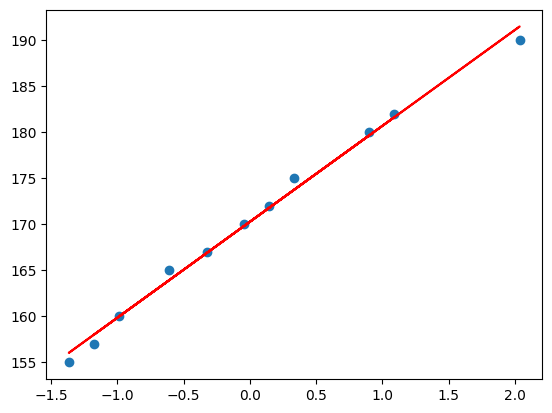

In [20]:
#plot training data plot bestfit line
plt.scatter(X_train,Y_train)

plt.plot(X_train, model.predict(X_train), color='red', label="Best Fit Line")

In [22]:
#prediction for test data
Y_pred=model.predict(X_test)
print(Y_pred)

[152.10444674 154.07342296 161.94932782 189.51499483 176.71664943
 185.5770424 ]


In [23]:
# performance metrics

from sklearn.metrics import mean_absolute_error,mean_squared_error
mse=mean_squared_error(Y_test,Y_pred)
mae=mean_absolute_error(Y_test,Y_pred)
rmse=np.sqrt(mse)
print("MSE:",mse)
print("MAE:",mae)
print("RMSE:",rmse)

MSE: 1.9064702219076095
MAE: 1.100654946570155
RMSE: 1.380749876663985


In [25]:
#find R square and adjust R square
from sklearn.metrics import r2_score
score= r2_score(Y_test,Y_pred)
print("R square:",score)
a_score=1-(1-score)*(len(Y_test)-1)/(len(Y_test)-X_test)
print("adjust R square:", a_score)





R square: 0.9917109990351843
adjust R square: [[0.99464859]
 [0.99451467]
 [0.99390451]
 [0.99001848]
 [0.99229818]
 [0.99085167]]


In [27]:
#Ols linear Regression
import statsmodels.api as sm
new_model= sm.OLS(Y_train,X_train).fit()
prediction=new_model.predict(X_test)
print(prediction)
print(new_model.summary())

[-18.16828053 -16.19930432  -8.32339945  19.24226756   6.44392216
  15.30431513]
                                 OLS Regression Results                                
Dep. Variable:                 Height   R-squared (uncentered):                   0.004
Model:                            OLS   Adj. R-squared (uncentered):             -0.096
Method:                 Least Squares   F-statistic:                            0.03740
Date:                Tue, 09 Sep 2025   Prob (F-statistic):                       0.851
Time:                        12:39:06   Log-Likelihood:                         -72.120
No. Observations:                  11   AIC:                                      146.2
Df Residuals:                      10   BIC:                                      146.6
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err       

In [28]:
## train new data
model.predict([[72]])
## this is the wrong


array([920.04183149])

In [29]:
model.predict(Scaler.transform([[72]]))

/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([173.76318511])